We will first create a baseline model using all of the available data and the average house price. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression

In [25]:
original_df = pd.read_csv('data/kc_house_data.csv')
df = original_df.copy()
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


First clean all the data to take care of null values and change categorical to numerical.

In [3]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [4]:
# for now we are converting all the Nulls with the the '0', or 'NO', or 'NONE' of their respective columns
# because they are overwhelmingly the most common value, so we think it's a safe assumption.

df['waterfront'] = df['waterfront'].fillna('NO')
df['yr_renovated'].fillna(0.0, inplace=True)
df['view'].fillna('NONE', inplace=True)

df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
# Take apart the date column, put it in to three columns as day month and year and have the values numeric.
df['date'] = pd.to_datetime(df['date'])
df['day_sold'] = df['date'].map(lambda x: x.day)
df['month_sold'] = df['date'].map(lambda x: x.month)
df['year_sold'] = df['date'].map(lambda x: x.year)
df.drop('date', axis=1, inplace=True)

In [6]:
# We simply convert the yes or no values to 1 and 0 respectively.
waterfront = preprocessing.LabelEncoder()
x1 = list(df['waterfront'])


waterfront.fit(x1)
waterfront_list = waterfront.transform(x1)
df['waterfront'] = waterfront_list
df['waterfront'].value_counts()


# 0 is NO WATERFRONT
# 1 is YES WATERFRONT

0    21451
1      146
Name: waterfront, dtype: int64

In [7]:
# Here we turn each unique value into a column and the column will have a 1 or 0 in it
# to say if that column is true for that house.
view = OneHotEncoder(sparse=False, handle_unknown='ignore')
x2 = df[['view']]
view.fit(x2)
view.transform(x2)
view_array = view.transform(x2)
view_panda = pd.DataFrame(view_array, columns=('View_Average', 'View_Excellent', 'View_Fair', 'View_Good', 'View_None'), index=df.index)
df = pd.concat([df, view_panda], axis=1)


In [8]:
# Do the same as we did for view.
condition = OneHotEncoder(sparse=False, handle_unknown='ignore')
X3 = df[['condition']]
condition.fit(X3)
condition.transform(X3)
condition_array = condition.transform(X3)
condition_panda = pd.DataFrame(condition_array, columns=('Cond_Average', 'Cond_Fair', 'Cond_Good', 'Cond_Poor',
                                                         'Cond_VeryGood'), index=df.index)
df = pd.concat([df, condition_panda], axis=1)

In [9]:
# And again the same for grade.
grade = OneHotEncoder(sparse=False, handle_unknown='ignore')
x4 = df[['grade']]
grade.fit(x4)
grade_array = grade.transform(x4)
grade_panda = pd.DataFrame(grade_array, columns= ('VeryGoodGrade', 'ExcellentGrade', 'LuxurGrade', 'MansionGrade',
                                                  'PoorGrade', 'LowGrade', 'FairGrade','LowAvgGrade','AvgGrade',
                                                  'GoodGrade', 'BetterGrade',),index=df.index)
df = pd.concat([df, grade_panda], axis=1)

In [10]:
# Convert all the ? values to 0.0 like we did for the other columns.
# Then convert the values from strings to int

df['sqft_basement'] = df["sqft_basement"].replace({"?": '0.0'})
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [11]:
# We can drop the original columns that we just converted.
df.drop(columns=('condition'), inplace=True)
df.drop(columns=('view'), inplace=True)
df.drop(columns=('grade'), inplace=True)
df.drop(['Cond_Average', 'View_None', 'AvgGrade'], axis=1, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21597 non-null  int64  
 1   price           21597 non-null  float64
 2   bedrooms        21597 non-null  int64  
 3   bathrooms       21597 non-null  float64
 4   sqft_living     21597 non-null  int64  
 5   sqft_lot        21597 non-null  int64  
 6   floors          21597 non-null  float64
 7   waterfront      21597 non-null  int64  
 8   sqft_above      21597 non-null  int64  
 9   sqft_basement   21597 non-null  float64
 10  yr_built        21597 non-null  int64  
 11  yr_renovated    21597 non-null  float64
 12  zipcode         21597 non-null  int64  
 13  lat             21597 non-null  float64
 14  long            21597 non-null  float64
 15  sqft_living15   21597 non-null  int64  
 16  sqft_lot15      21597 non-null  int64  
 17  day_sold        21597 non-null 

We now have zero missing values and everything is int or float.
We can start working on our base model.

In [13]:
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=100)

In [14]:
baseline = DummyRegressor()
baseline.fit(X_train, y_train)
baseline.score(X_train, y_train)

0.0

In [15]:
baseline.score(X_test, y_test)

-0.0002252015545449737

We see that our baseline score, which is from always predicting the average price is very low.
Let's start trying to make real predictions using a Linear regressionon all the data.

In [21]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.7315060627312486

In [22]:
lr.score(X_test, y_test)

0.7312203494032898

In [23]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [24]:
outcome = 'price'
predictors = df.drop(['price'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     1597.
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        16:29:55   Log-Likelihood:            -2.9314e+05
No. Observations:               21597   AIC:                         5.864e+05
Df Residuals:                   21559   BIC:                         5.867e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -6.159e+07   9.45e+06     -6.517      0.000   -8.01e+07   -4.31e+07
id             -6.711e-07   4.57e-07     -1.470      0.142   -1.57e-06    2.24e-07
bedrooms       -2.049e+04   1834.600    -11.170      0.000   -2.41e+04   -1.69e+04
bathrooms       4.377e+04   3102.706     14.108      0.000    3.77e+04    4.99e+04
sqft_living       99.9452     17.083      5.851      0.000      66.461     133.429
sqft_lot           0.1224      0.045      2.696      0.007       0.033       0.211
floors          2.656e+04   3461.270      7.673      0.000    1.98e+04    3.33e+04
waterfront      5.527e+05   1.93e+04     28.642      0.000    5.15e+05    5.91e+05
sqft_above        33.3972     17.097      1.953      0.051      -0.115      66.909
sqft_basement     31.8861     16.926      1.884      0.060      -1.290      65.062
yr_built       -2187.5016     69.581    -31.438      0.000   -2323.885   -2051.118
yr_renovated      34.8494      3.778      9.224      0.000      27.444      42.255
zipcode         -604.2081     31.371    -19.260      0.000    -665.698    -542.718
lat             6.176e+05   1.02e+04     60.691      0.000    5.98e+05    6.38e+05
long           -2.049e+05   1.25e+04    -16.409      0.000   -2.29e+05    -1.8e+05
sqft_living15     26.8759      3.295      8.158      0.000      20.418      33.334
sqft_lot15        -0.3847      0.069     -5.537      0.000      -0.521      -0.249
day_sold        -341.6022    150.786     -2.265      0.023    -637.154     -46.051
month_sold      1125.9317    671.445      1.677      0.094    -190.150    2442.013
year_sold       3.515e+04   4473.217      7.858      0.000    2.64e+04    4.39e+04
View_Average    7.144e+04   6518.785     10.959      0.000    5.87e+04    8.42e+04
View_Excellent  2.586e+05   1.35e+04     19.184      0.000    2.32e+05    2.85e+05
View_Fair       1.182e+05   1.07e+04     11.027      0.000    9.72e+04    1.39e+05
View_Good       1.373e+05   8929.137     15.380      0.000     1.2e+05    1.55e+05
Cond_Fair      -9412.6637   1.49e+04     -0.634      0.526   -3.85e+04    1.97e+04
Cond_Good       3.062e+04   3301.219      9.276      0.000    2.42e+04    3.71e+04
Cond_Poor      -6.758e+04   3.57e+04     -1.895      0.058   -1.37e+05    2320.413
Cond_VeryGood   7.439e+04   5270.780     14.114      0.000    6.41e+04    8.47e+04
VeryGoodGrade   3.433e+05   8070.417     42.536      0.000    3.27e+05    3.59e+05
ExcellentGrade  5.879e+05   1.24e+04     47.414      0.000    5.64e+05    6.12e+05
LuxurGrade      1.042e+06   2.28e+04     45.703      0.000    9.97e+05    1.09e+06
MansionGrade    2.239e+06   5.49e+04     40.742      0.000    2.13e+06    2.35e+06
PoorGrade       9.718e+04    1.9e+05      0.511      0.610   -2.76e+05     4.7e+05
LowGrade       -5.491e+04   3.69e+04     -1.488      0.137   -1.27e+05    1.74e+04
FairGrade   

We see our R-squared is relatively good but we don't know how big our errors are.

In [28]:
 y_pred = model.predict(X_test)
# error=y_pred-y_test
# sq_of_err=(error)**2
# mean_sqr_of_errors=sq_of_err.mean()
# print(mean_sqr_of_errors)
# sqr_mean_sqr_errors= np.sqrt(mean_sqr_of_errors)
# print(sqr_mean_sqr_errors)
from sklearn import metrics
actual = y_test
predicted = y_pred

mse = metrics.mean_squared_error(actual, predicted)

rmse = np.sqrt(mse)

print(rmse)

199712.49444880913


That is obviously a massive error. we'll try to work on the data to normalize and find the best variables to use so that 
We limit our error while keeping our R-squared high.

Let's take a look at all the variables graphed against price.

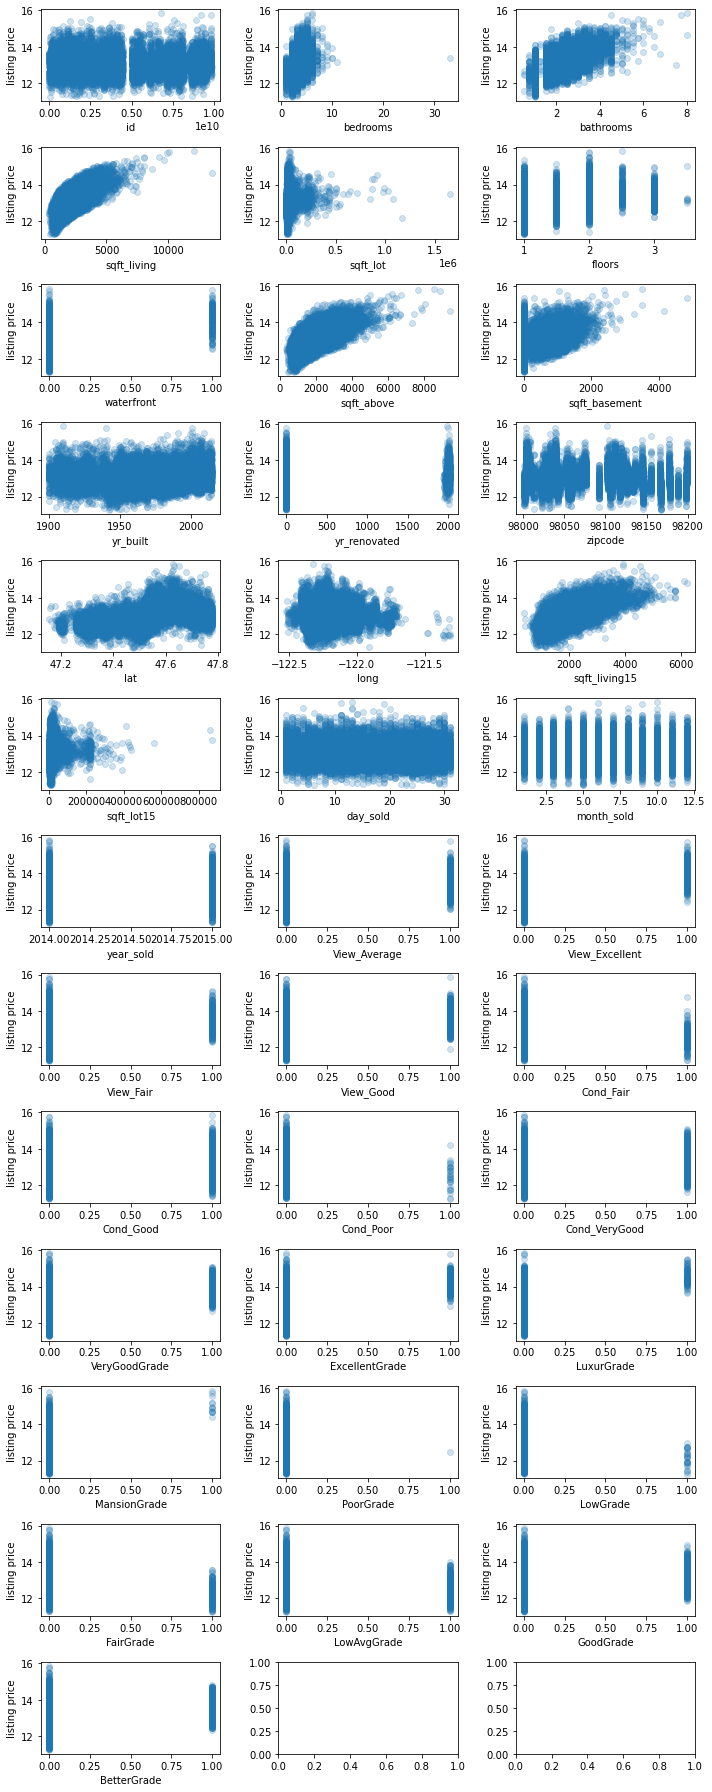

In [29]:
fig, axes = plt.subplots(ncols=3, nrows=13, figsize=(10, 25))
fig.set_tight_layout(True)

for index, col in enumerate(X.columns):
    ax = axes[index//3][index%3]
    ax.scatter(X[col], np.log(y), alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("listing price")